# OCR

## 들어가며

* 원형정합 방법 : 문자패턴을 배열 형태로 분류해 원형 패턴을 비교, 가장 유사한 형태를 찾아내는 방법
  - 하나의 고정된 문자에만 사용가능하다.
* 통계적 방법 : 학습단계를 통해 특정 벡터의 통계적인 확률분포 특징을 구하고, 이를 이용해 특징벡터 공간을 각 분류별로 분리
  - 특징 벡터를 활용
* 구조 분석적 방법 : 문자의 구성원리에 입각해 자획 등과 같은 문자를 구성하는 기본 요소와 그들의 연관성을 추출해 문자를 인식하는 방법
  - 글자의 구성요소를 통해 분석

## 기계가 읽을 수 있나요?

In [1]:
# ! pip install --upgrade google-api-python-client
# ! pip install google-cloud-vision

## 어떤 과정으로 읽을까요?

* Text Detection(문자 검출) : 사진 속 문자를 찾아냅니다.
* Text Recognition(문자 인식) : 찾은 문자 영역으로부터 문자를 읽어냅니다.

* 문자의 영역을 표현하는 방법
* 축에 정렬된 사각형 : Bounding box
* 돌아간 사각형 : Oriented bounding box
* 자유로운 사각형 : Quadrangle
* 다각형 : Polygon
* Pixel 수준으로 영역을 표현한 Mask

## 딥러닝 문자 인식의 시작

* [MNIST LeNet](https://ruslanmv.com/assets/tensorspace/html/playground/lenet.html)
* 가려진 케이스에 대한 데이터를 확보하거나 Augmentation을 통해서 해당 케이스에 대한 강건성을 확보합니다.

## 사진 속 문자 찾아내기 - detection

* Object Detection : 이미지 속에서 물체를 찾아내는 딥러닝 모델에게 문자를 찾도록 학습
* 객체 검출 방법
  - Regressoin : 기준 박스와 문자의 박스가 얼마나 차이나는지 학습
  - Segmentation : 픽셀 단위로 해당 픽셀이 문자를 표현하는지 분류하는 문제(pixel-wise classification)

## 사진 속 문자 읽어내기 - recognition

* 영역을 잘라주면 그 영역에 어떤 글자가 포함되어 있는지 읽어내는 과정.
* CRNN : 이미지의 Text와 연관된 특징을 CNN으로 추출한 후 스텝 단위 문자 정보를 RNN으로 인식

## keras-ocr 써보기

In [2]:
# ! pip3 install keras-ocr  

* keras_ocr.pipeline.Pipeline() : pipeline for recognition
* 초기화 과정에서 미리 학습된 모델의 가중치를 불러옴.(훈련이 필요없다)
* 검출기, 인식기를 위한 가중치 하나씩
* 검출기 = 바운딩 박스(bounding box, 문자가 있는 영역을 표시한 정보)를 검출
* 인식기 = 박스로부터 문자를 인식

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import keras_ocr
import pandas as pd
import os
import pytesseract
import cv2
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt


# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /home/aiffel/.keras-ocr/craft_mlt_25k.h5


2022-09-13 18:59:55.383620: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-13 18:59:55.813946: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6668 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2070, pci bus id: 0000:01:00.0, compute capability: 7.5


Looking for /home/aiffel/.keras-ocr/crnn_kurapan.h5


* images에 url에 해당하는 이미지들을 넣습니다.
* def recognize(self, image): Recognize text from a single image.
* url이 뭔가 에러가 뜨므로 직접 이미지를 다운받아서 사용하겠습니다.
* [keras ocr pipline](https://github.com/faustomorales/keras-ocr/blob/master/keras_ocr/pipeline.py)

In [4]:
# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
# image_urls = [
#   'https://source.unsplash.com/M7mu6jXlcns/640x460',
#   'https://source.unsplash.com/6jsp4iHc8hI/640x460',
#   'https://source.unsplash.com/98uYQ-KupiE',
#   'https://source.unsplash.com/j9JoYpaJH3A',
#   'https://source.unsplash.com/eBkEJ9cH5b4'
# ]

# images = [ keras_ocr.tools.read(url) for url in image_urls]
# prediction_groups = [pipeline.recognize([url]) for url in image_urls]

image_paths = [
  'image/1.jpeg',
  'image/2.jpeg',
  'image/3.jpeg',
  'image/4.jpeg',
  'image/5.jpeg',  
]

images = [ cv2.imread(image_path) for image_path in image_paths]
prediction_groups = [pipeline.recognize([image_path]) for image_path in image_paths]

2022-09-13 18:59:58.595054: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8204


1/1 [==============================] - 0s 28ms/step


In [5]:
images

[array([[[198, 211, 227],
         [198, 211, 227],
         [197, 210, 226],
         ...,
         [232, 233, 237],
         [232, 233, 237],
         [232, 233, 237]],
 
        [[198, 211, 227],
         [198, 211, 227],
         [198, 211, 227],
         ...,
         [232, 233, 237],
         [232, 233, 237],
         [232, 233, 237]],
 
        [[198, 211, 227],
         [198, 211, 227],
         [198, 211, 227],
         ...,
         [232, 233, 237],
         [232, 233, 237],
         [232, 233, 237]],
 
        ...,
 
        [[226, 220, 221],
         [230, 224, 225],
         [231, 225, 226],
         ...,
         [ 88,  64,  28],
         [ 93,  67,  31],
         [ 94,  68,  31]],
 
        [[226, 220, 221],
         [230, 224, 225],
         [230, 224, 225],
         ...,
         [ 21,   7,   0],
         [ 21,   7,   0],
         [ 21,   8,   0]],
 
        [[228, 222, 223],
         [232, 226, 227],
         [232, 226, 227],
         ...,
         [ 23,  15,   2],
  

In [6]:
prediction_groups

[[[('up',
    array([[382., 135.],
           [465., 135.],
           [465., 191.],
           [382., 191.]], dtype=float32)),
   ('wake',
    array([[ 64.1859  , 136.59784 ],
           [248.27821 , 138.45737 ],
           [247.7416  , 191.58325 ],
           [ 63.649277, 189.72372 ]], dtype=float32)),
   ('me',
    array([[267.16342, 138.51817],
           [362.61832, 136.44307],
           [363.7969 , 190.65657],
           [268.342  , 192.73167]], dtype=float32)),
   ('wheni',
    array([[ 67.19858, 224.42595],
           [343.5249 , 227.54828],
           [342.7856 , 292.97498],
           [ 66.45929, 289.85266]], dtype=float32)),
   ('im',
    array([[334.52377, 223.8105 ],
           [462.91245, 226.37827],
           [461.5634 , 293.8313 ],
           [333.1747 , 291.26352]], dtype=float32)),
   ('famous',
    array([[ 58.62671, 325.90402],
           [474.86896, 333.33694],
           [473.3819 , 416.61392],
           [ 57.13965, 409.181  ]], dtype=float32))]],
 [[('8625',
 

* keras_ocr.tools.drawAnnotations : Draw text annotations onto image.
* image – The image on which to draw
* predictions – The predictions as provided by pipeline.recognize.
* ax – A matplotlib axis on which to draw.

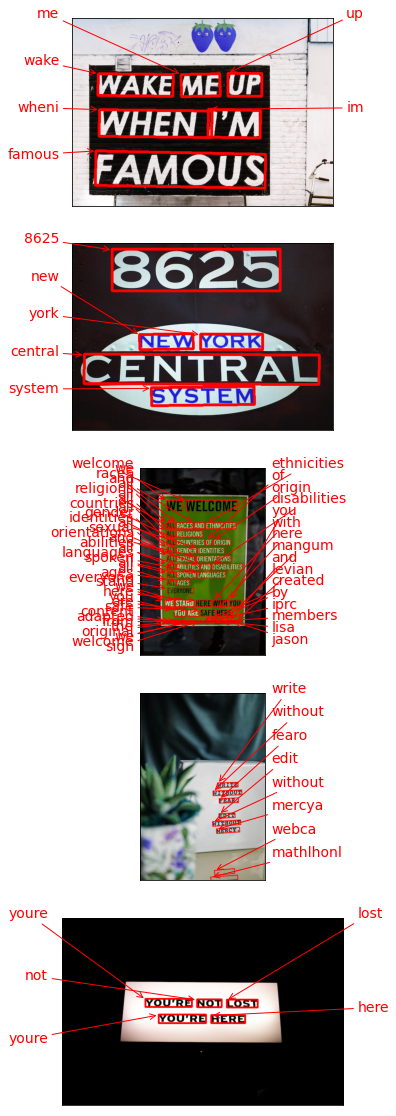

In [7]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], predictions=prediction_groups[idx][0], ax=ax)

## 테서랙트 써보기

* OCR 엔진 모드의 종류(-oem):
0. Legacy engine only.
1. Neural nets LSTM engine only.
2. Legacy + LSTM engines.
3. Default, based on what is available.


* Page segmentation modes(–psm):
0. Orientation and script detection (OSD) only.
1. Automatic page segmentation with OSD.
2. Automatic page segmentation, but no OSD, or OCR.
3. Fully automatic page segmentation, but no OSD. (Default)
4. Assume a single column of text of variable sizes.
5. Assume a single uniform block of vertically aligned text.
6. Assume a single uniform block of text.
7. Treat the image as a single text line.
8. Treat the image as a single word.
9. Treat the image as a single word in a circle.
10. Treat the image as a single character.
11. Sparse text. Find as much text as possible in no particular order.
12. Sparse text with OSD.
13. Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

In [8]:
# crop_word_regions 함수를 정의합니다.
# parameter로는 image_path와 output_path를 받습니다.
# 아마 image_path의 입력 이미지로 부터 글자를 찾아서 output_path에 저장하는 것 같습니다.
def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    # 입력한 ouput 폴더가 없다면 새롭게 생성합니다.
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    # oem, psm 을 각각 3으로 설정합니다. (둘다 기본값 입니다.)
    # oem 3 : Default, based on what is available.
    # psm 3 : Fully automatic page segmentation, but no OSD. (Default)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    # image_path에 있는 이미지를 엽니다.
    image = Image.open(image_path)

    # Get verbose data including boxes, confidences, line and page numbers
    # image_to_data : result containing box boundaries, confidences, and other information
    # image : image_path의 이미지
    # lang : 사용할 언어
    # config : 위의 oem3, psm3을 사용합니다.
    # output_type : ouput 종류
    # 1. Output.BYTES
    # 2. Output.DICT
    # 3. Output.STRING(default)
    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    # level 중 가장 높은 값을 top_level로 둔다. (해당 level : 1 ~ 5 이므로 5)     
    top_level = max(recognized_data['level'])
    # 인덱스 초기화
    index = 0
    # 이미지에서 잘라잰 부분을 저장할 리스트
    cropped_image_path_list = []
    # 전체 level의 갯수에 따라 반복
    for i in range(len(recognized_data['level'])):
        # recognized_data 딕셔너리의 key : level의 value
        level = recognized_data['level'][i]
        # level이 top_level(5) 일때
        if level == top_level:
            # 좌, 상단, 너비, 높이를 구합니다.
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            # output_path에 
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            # print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list , recognized_data


work_dir = 'data/output'
img_file_path = 'data/goldBusinessCard/5692498.jpg'

cropped_image_path_list, recognized_data = crop_word_regions(img_file_path, work_dir)

* recognized_data 분석
* [참고사이트](https://medium.com/geekculture/tesseract-ocr-understanding-the-contents-of-documents-beyond-their-text-a98704b7c655)
* text : 

In [9]:
print(recognized_data.keys())
set(recognized_data['level'])

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


{1, 2, 3, 4, 5}

In [10]:
df_recognized = pd.DataFrame(recognized_data)
display(df_recognized[df_recognized['level'] == 5])

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
4,5,1,1,1,1,1,900,407,207,50,0,"ea"""
6,5,1,1,1,2,1,899,469,208,50,62,aa
10,5,1,2,1,1,1,790,613,258,64,95,COMPANY
11,5,1,2,1,1,2,1076,613,127,64,94,LOGO
15,5,1,3,1,1,1,873,693,67,15,95,YOUR
16,5,1,3,1,1,2,953,693,100,15,96,SLOGAN
17,5,1,3,1,1,3,1067,693,63,15,96,HERE
21,5,1,4,1,1,1,322,122,1366,786,95,
25,5,1,5,1,1,1,1212,1157,371,62,15,Ph
29,5,1,6,1,1,1,1286,1239,138,18,96,GENERAL


In [14]:
text = recognized_data['text']
text = [v for v in text if v]
text

['ea"',
 'aa',
 'COMPANY',
 'LOGO',
 'YOUR',
 'SLOGAN',
 'HERE',
 ' ',
 'Ph',
 'GENERAL',
 'MANAGER',
 '+070',
 '6754',
 '76854',
 '+070',
 '6754',
 '76854',
 'ot',
 'YOURMAIL@GMAIL.COM',
 'URWEBSITENAME.COM',
 'i',
 'Nok)',
 'Mec',
 '8-8',
 'a',
 'a',
 'Wb)',
 '8a',
 'SI',
 '©',
 'gd',
 'eel',
 'KelS3°',
 '0',
 'VO',
 'PA)']

* 원본 이미지 입니다.

<img src = "data/goldBusinessCard/5692498.jpg" width = 50% height = 50%>

* 테서랙트로 잘린 이미지에서 단어 인식하기

Ry Hy



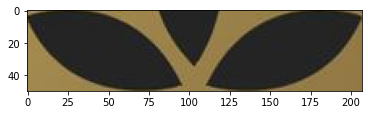

Baw



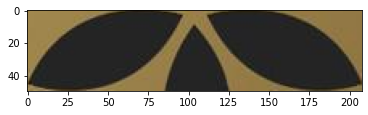

GO MPANY



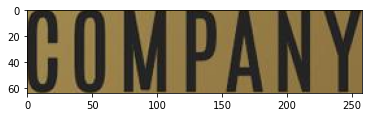

1G ()



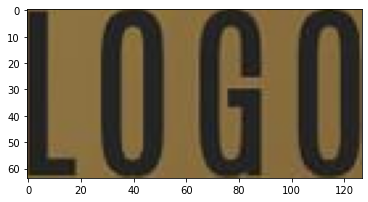

YOUR



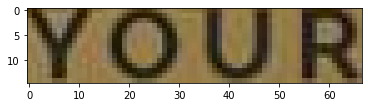

SLOGAN



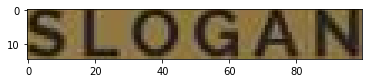

HERE



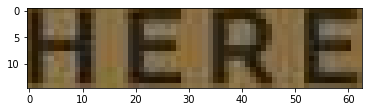

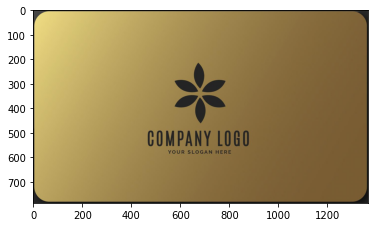

HUG



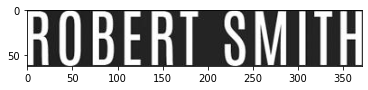

(GENERAL



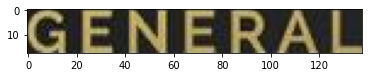

MANAGER



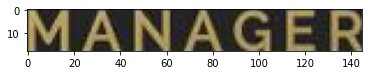

+0 /Q



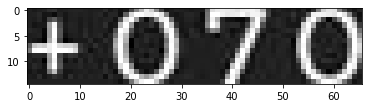

H/54



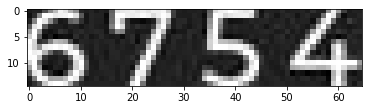

46854



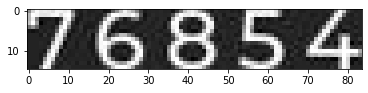

aeomae



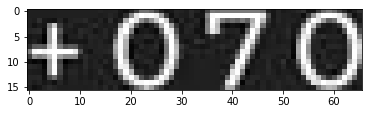

5/54



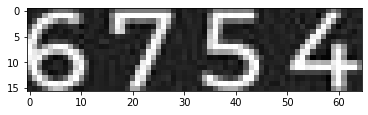

J6854



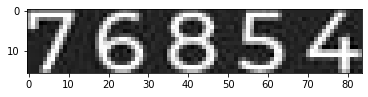

KS



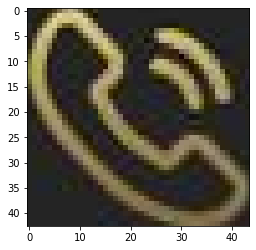

YOURMAIL@GMAIL.COM



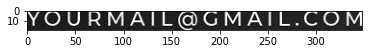

URVWVEBSI IT ENAME.COM



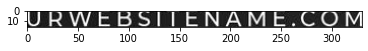

<



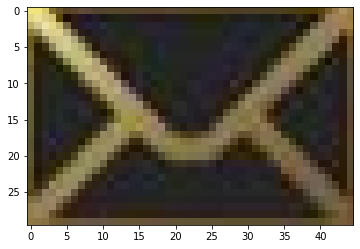

YOUR



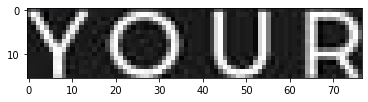

iS



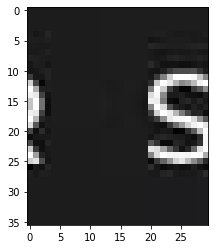

TREET



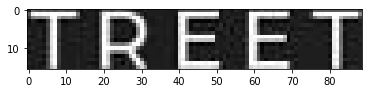

=



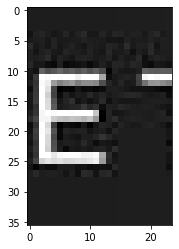

r



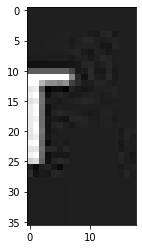

AS DED



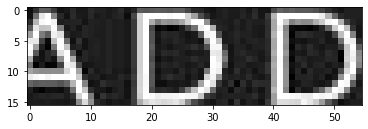

as



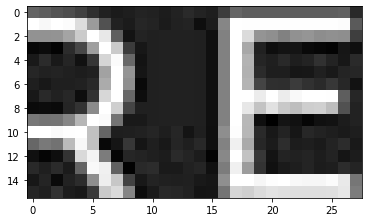

—_



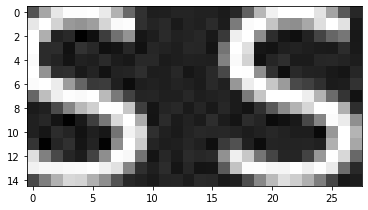

(0)



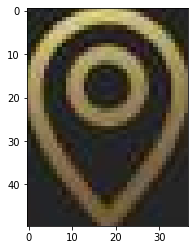

STREET



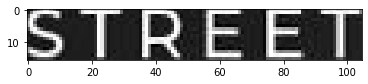

rel



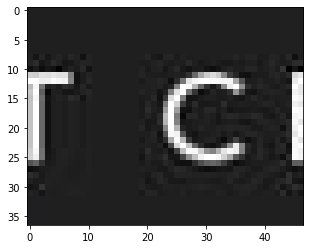

23OR- en e+e.



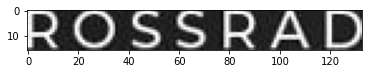

:



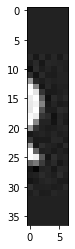

AD



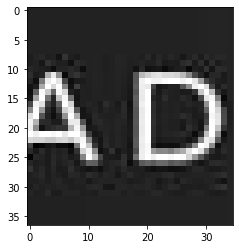

| ee.



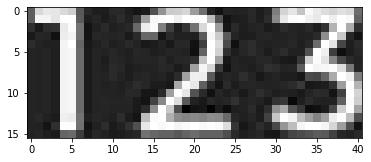

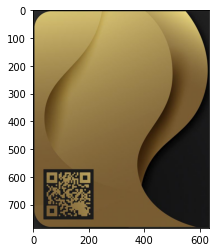

완료


In [17]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
        plt.imshow(image)
        plt.show()
    print("완료")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)